In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

In [31]:
#print(df.head)
print(df_test.columns)

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')


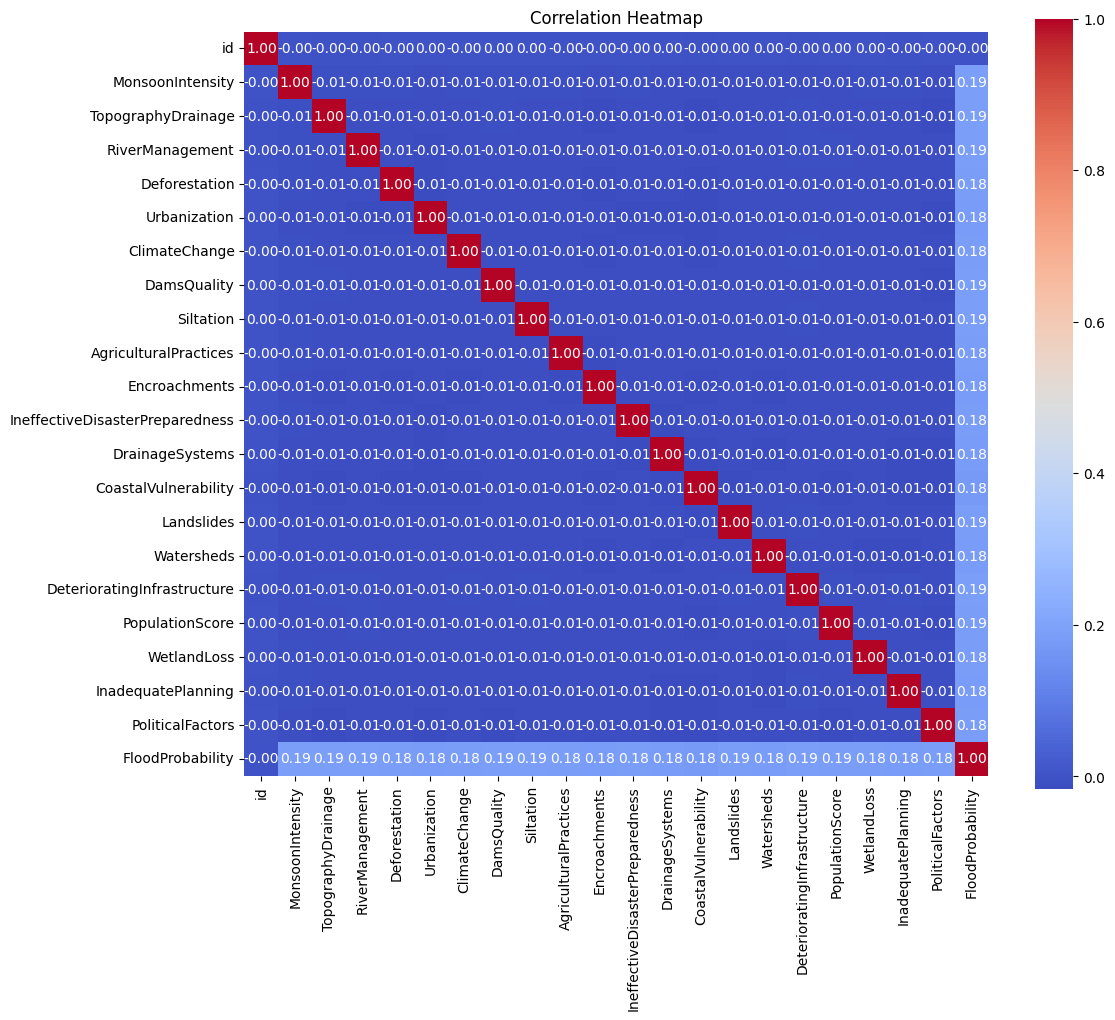

In [43]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # You can adjust the size of the figure as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Identify features and target
X_train = df_train.drop(columns=['FloodProbability'])
y_train = df_train['FloodProbability']
X_test = df_test  # Assuming df_test has the same structure minus the target column

# Handle missing values (if any)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Optional: Standardize the data (if necessary)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
forest_reg = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)  # Further limiting complexity

print(11)
# Train the models
linear_reg.fit(X_train, y_train)
print(11)
tree_reg.fit(X_train, y_train)
print(11)
forest_reg.fit(X_train, y_train)

11
11
11


RandomForestRegressor(max_depth=10, n_estimators=10, n_jobs=-1, random_state=42)

In [35]:
# Predict with the models
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)
y_pred_forest = forest_reg.predict(X_test)

# Print predictions
print("Linear Regression Predictions:", y_pred_linear[:5])  # Show first 5 predictions
print("Decision Tree Regression Predictions:", y_pred_tree[:5])
print("Random Forest Regression Predictions:", y_pred_forest[:5])

Linear Regression Predictions: [0.57363594 0.45526411 0.45476316 0.46622509 0.46608835]
Decision Tree Regression Predictions: [0.53280693 0.50271869 0.45001512 0.48594458 0.48800718]
Random Forest Regression Predictions: [0.52259455 0.48296005 0.47855656 0.46455525 0.49607434]


In [37]:
df_pred_linear = pd.DataFrame({'id': df_test['id'], 'prediction': y_pred_linear})
df_pred_tree = pd.DataFrame({'id': df_test['id'], 'prediction': y_pred_tree})
df_pred_forest = pd.DataFrame({'id': df_test['id'], 'prediction': y_pred_forest})

In [38]:
df_pred_linear.to_csv('/kaggle/working/linear_regression_predictions.csv', index=False)
df_pred_tree.to_csv('/kaggle/working/decision_tree_predictions.csv', index=False)
df_pred_forest.to_csv('/kaggle/working/random_forest_predictions.csv', index=False)